<a href="https://colab.research.google.com/gist/qbeer/22fe5333a1bd5c329fc2982d7dc5f7e0/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised learning introduction, K-Nearest Neighbors (KNN)

Your task will be to predict wine quality from physicochemical features with the help of the 
[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). You will have to do it both as a regression and classification task. 


-------

### 1. Read data
  - Read the provided winequality-red.csv file. 
  - Check for missing values and that all entries are numerical. Also, check for duplicated entries (rows) and drop them.  
  - Use all columns except the last as features and the quality column as target. 
  - Make 80-20% train test split (use sklearn).
  - Prepare a one-hot encoded version of the y_test and y_train values ie. make a six long vector of the 6 quality classes (3-8), with only one non-zero value, e.g. 3->[1,0,0,0,0,0], 4->[0,1,0,0,0,0], 5->[0,0,1,0,0,0] etc. (You can use pandas or sklearn for that.) *You will have to use the one-hot encoded labels in the classification exercise only.*
  - Normalize the features by substracting the means and dividing by the standard deviation feature by feature. If you want to be very precise, you should use only the mean and std in the training set for normalization, because generally the test test is not available at training time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wines = pd.read_csv('winequality-red.csv', sep=';')
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
print('Are there NaN values? ' + str(np.any(wines.isna())))
print('Duplications: ' + str(wines.duplicated().sum()))

Are there NaN values? False
Duplications: 240


In [4]:
wines = wines[~wines.duplicated()].reset_index(drop=True)
print(wines.duplicated().sum())

0


In [5]:
from sklearn.model_selection import train_test_split #to split up the data into training and testing
feature = wines.columns[0:11] #select the features
X_train, X_test, y_train, y_test = train_test_split(wines[feature],
                 wines['quality'],
                 train_size=0.8)

In [6]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
446,10.7,0.400,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7
875,7.2,0.340,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1
1299,6.1,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,3.60,0.66,10.2
268,10.3,0.410,0.42,2.4,0.213,6.0,14.0,0.99940,3.19,0.62,9.5
435,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
...,...,...,...,...,...,...,...,...,...,...,...
310,6.7,0.750,0.01,2.4,0.078,17.0,32.0,0.99550,3.55,0.61,12.8
919,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8
1349,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8
165,7.7,0.705,0.10,2.6,0.084,9.0,26.0,0.99760,3.39,0.49,9.7


In [7]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
115,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9
464,10.3,0.270,0.24,2.1,0.072,15.0,33.0,0.99560,3.22,0.66,12.8
935,8.4,0.340,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4
1044,7.5,0.580,0.03,4.1,0.080,27.0,46.0,0.99592,3.02,0.47,9.2
375,12.8,0.840,0.63,2.4,0.088,13.0,35.0,0.99970,3.10,0.60,10.4
...,...,...,...,...,...,...,...,...,...,...,...
510,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0
324,6.9,0.765,0.02,2.3,0.063,35.0,63.0,0.99750,3.57,0.78,9.9
1021,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5
306,9.1,0.795,0.00,2.6,0.096,11.0,26.0,0.99940,3.35,0.83,9.4


In [8]:
y_train

446     6
875     6
1299    5
268     6
435     6
       ..
310     6
919     6
1349    6
165     5
108     6
Name: quality, Length: 1087, dtype: int64

In [9]:
y_test

115     5
464     6
935     6
1044    5
375     6
       ..
510     8
324     5
1021    6
306     6
394     6
Name: quality, Length: 272, dtype: int64

- Prepare a one-hot encoded version of the y_test and y_train values ie. make a six long vector of the 6 quality classes (3-8), with only one non-zero value, e.g. 3->[1,0,0,0,0,0], 4->[0,1,0,0,0,0], 5->[0,0,1,0,0,0] etc. (You can use pandas or sklearn for that.) *You will have to use the one-hot encoded labels in the classification exercise only.*

In [10]:
onehot_test = pd.get_dummies(y_test, prefix='quality')
onehot_train = pd.get_dummies(y_train, prefix='quality')
onehot_test

,quality_4,quality_5,quality_6,quality_7,quality_8
115,0,1,0,0,0
464,0,0,1,0,0
935,0,0,1,0,0
1044,0,1,0,0,0
375,0,0,1,0,0
...,...,...,...,...,...
510,0,0,0,0,1
324,0,1,0,0,0
1021,0,0,1,0,0
306,0,0,1,0,0


 - Normalize the features by substracting the means and dividing by the standard deviation feature by feature. If you want to be very precise, you should use only the mean and std in the training set for normalization, because generally the test test is not available at training time.

In [11]:
X_test_norm = (X_test - X_train.mean())/X_train.std()
X_train_norm = (X_train - X_train.mean())/X_train.std()
X_test_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
115,-0.131773,4.421504,-1.405467,-0.537395,-0.119184,-1.243388,-1.042448,-0.164917,1.504249,-1.046772,0.428013
464,1.120703,-1.408096,-0.175401,-0.313983,-0.341976,-0.100498,-0.416757,-0.599565,-0.569705,-0.000160,2.179210
935,0.039019,-1.023122,0.747150,-0.313983,-0.341976,0.661429,-0.327373,-1.512326,-1.282627,0.697580,1.810537
1044,-0.473358,0.296787,-1.251709,1.175432,-0.163743,1.042392,-0.029425,-0.425706,-1.865927,-1.104917,-1.138848
375,2.543972,1.726689,1.823458,-0.090571,0.014491,-0.290979,-0.357168,1.628006,-1.347438,-0.349031,-0.032828
...,...,...,...,...,...,...,...,...,...,...,...
510,-1.896627,-0.583152,-0.175401,-0.388454,-0.609326,0.280465,0.089754,-2.718474,2.670848,0.465000,3.285229
324,-0.814942,1.314217,-1.302962,-0.165041,-0.542489,1.804318,0.477087,0.432724,1.698682,0.697580,-0.493670
1021,-0.245635,0.296787,-0.226653,-0.165041,-0.252859,0.661429,1.400726,0.085005,-0.634517,-0.465321,-0.862343
306,0.437534,1.479206,-1.405467,0.058371,0.192724,-0.481461,-0.625321,1.465013,0.272839,0.988306,-0.954511


### 2. KNN regression
- Implement naive K nearest neighbour regression as a function only using python and numpy. The signature of the function should be:
```python
def knn_regression(x_test, x_train, y_train, k=20):
        """Return prediction with knn regression."""
        .
        .
        .
        return y_pred
```
- Use Euclidean distance as a measure of distance.
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

-----

In [27]:
def euclidean(p_1,p_2):
    p_1 = np.array(p_1)
    p_2 = np.array(p_2)
    return np.linalg.norm(p_1 - p_2)

def knn_regression(x_test, x_train, y_train, k=20):
    """Return prediction with knn regression.
    """
    y_pred = []
    for p_test in x_test.to_numpy():
        distances = np.empty(len(X_train)) #create empty array for holding distances
        i = 0 
        for p_train in x_train.to_numpy(): #loop through X_train normalised values
            d = euclidean(p_test,p_train) #calculate the euclidean distance
            distances[i] = d #store
            i = i + 1
        nn = distances.argsort()[:k]
        q_kY = y_train.to_numpy()[nn] #quality
        q_value, q_count = np.unique(q_kY, return_counts=True) #select the occuring qualities
        q_max = np.random.choice(q_value[max(q_count) == q_count]) #select the highest occuring quality (if more with same occurance, randomly)    
        y_pred.append(q_max)
    return y_pred

5

In [29]:
y_pred = knn_regression(X_test_norm, X_train_norm, y_train)

In [30]:
np.unique(y_test - y_pred, return_counts=True)

(array([-2, -1,  0,  1,  2]), array([  4,  45, 150,  69,   4]))

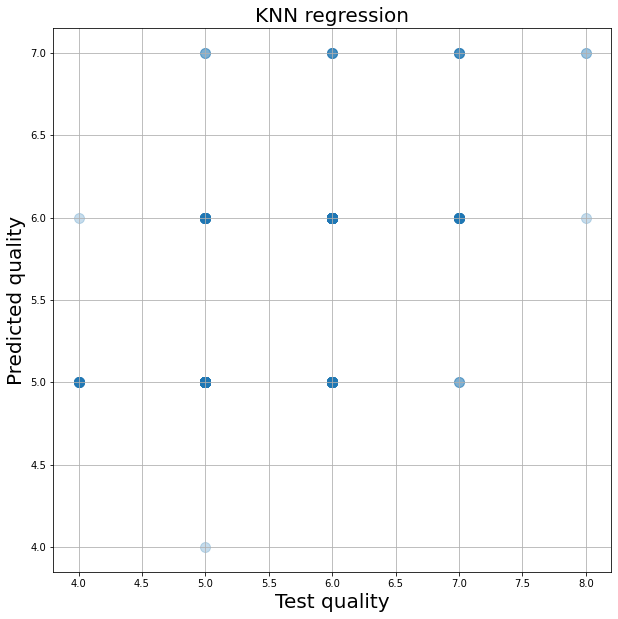

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred,s=100,alpha=0.25)
plt.title('KNN regression', fontsize=20)
plt.xlabel('Test quality', fontsize=20)
plt.ylabel('Predicted quality', fontsize=20)
plt.grid(True)

### 3. Weighted KNN regression
- Modify the knn_regression function by adding a weight to each neighbor that is inversely proportional to the distance.
```python
def knn_weighted_regression(x_test,x_train,y_train,k=20):
    """Return prediction with weighted knn regression."""
    ...
    return y_pred
```
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

-----

In [97]:
def knn_weighted_regression(x_test,x_train,y_train,k=20):
    y_pred = []
    for p_test in x_test.to_numpy():
        distances = np.empty(len(X_train)) #create empty array for holding distances
        i = 0 
        for p_train in x_train.to_numpy(): #loop through X_train normalised values
            d = euclidean(p_test,p_train) #calculate the euclidean distance
            distances[i] = d #store
            i = i + 1
        nn = distances.argsort()[:k] #sorted in descending order->last k will be the smallest->closest
        q_kY = y_train.to_numpy()[nn] #quality
        q_value, q_count = np.unique(q_kY, return_counts=True) #select the occuring qualities
        #weighting
        weights = 1/distances[nn]
        #creates dataframe from the weights with indices as the qualities of the points
        df_weights = pd.DataFrame(weights,index=y_train.to_numpy()[nn])
        #sums up based on the correct indices
        weighted = []
        for i_val in q_value:
            weighted.append(df_weights[df_weights.index == i_val].sum())
        #swap the list to array
        weighted = np.asarray(weighted)
        #mask based on the maximal weight
        mask = max(weighted) == weighted
        mask = np.reshape(mask, np.shape(mask)[0])
    #    print(weighted)
    #    print(mask)
    #    print(q_value)
        #we can use the fact np.unique returns sorted array
        q_max = int(q_value[mask])
        y_pred.append(q_max)
    return y_pred

In [113]:
"""y_pred = []
for p_test in X_test_norm.to_numpy():
    distances = np.empty(len(X_train)) #create empty array for holding distances
    i = 0 
    for p_train in X_train_norm.to_numpy(): #loop through X_train normalised values
        d = euclidean(p_test,p_train) #calculate the euclidean distance
        distances[i] = d #store
        i = i + 1
    nn = distances.argsort()[:3] #sorted in descending order->last k will be the smallest->closest
    q_kY = y_train.to_numpy()[nn] #quality
    q_value, q_count = np.unique(q_kY, return_counts=True) #select the occuring qualities
    #weighting
    weights = 1/distances[nn]
    #creates dataframe from the weights with indices as the qualities of the points
    df_weights = pd.DataFrame(weights,index=y_train.to_numpy()[nn])
    #sums up based on the correct indices
    weighted = []
    for i_val in q_value:
        weighted.append(df_weights[df_weights.index == i_val].sum())
    #swap the list to array
    weighted = np.asarray(weighted)
    #mask based on the maximal weight
    mask = max(weighted) == weighted
    mask = np.reshape(mask, np.shape(mask)[0])
#    print(weighted)
#    print(mask)
#    print(q_value)
    #we can use the fact np.unique returns sorted array
    q_max = int(q_value[mask])
    y_pred.append(q_max)
"""

In [100]:
y_pred = knn_weighted_regression(X_test_norm, X_train_norm, y_train)

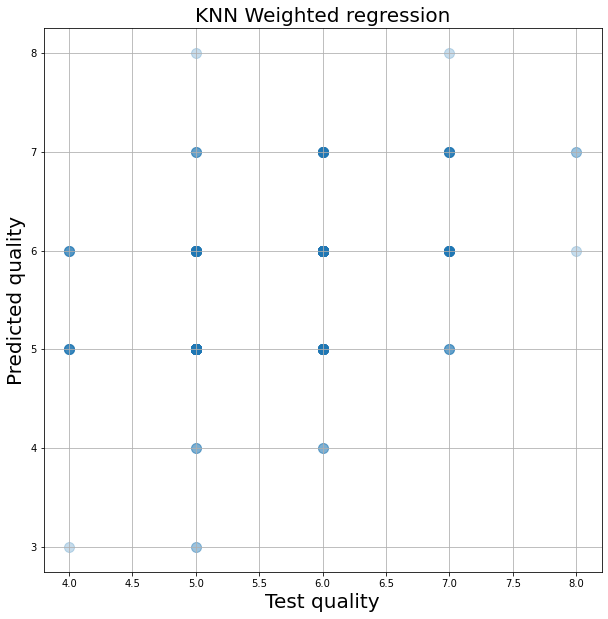

In [117]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred,s=100,alpha=0.25)
plt.title('KNN Weighted regression', fontsize=20)
plt.xlabel('Test quality', fontsize=20)
plt.ylabel('Predicted quality', fontsize=20)
plt.grid(True)

In [116]:
np.unique(y_test - y_pred, return_counts=True)

(array([-3, -2, -1,  0,  1,  2]), array([  1,   9,  51, 141,  60,  10]))

### 4. KNN classification
- Implement the K-nearest neighbors classification algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporting the given class divided by k (for example if k is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). Use the one-hot encoded labels!
```python
def knn_classifier(X_train, y_train, X_test, k=20):
  """Return prediction with knn classification."""
    ...
    return y_pred
```

- Make prediction with k=20 for the test set using the training data.

-----

In [ ]:
def knn_weighted_regression(x_test,x_train,y_train,k=20):
    y_pred = []
    for p_test in x_test.to_numpy():
        distances = np.empty(len(X_train)) #create empty array for holding distances
        i = 0 
        for p_train in x_train.to_numpy(): #loop through X_train normalised values
            d = euclidean(p_test,p_train) #calculate the euclidean distance
            distances[i] = d #store
            i = i + 1
        nn = distances.argsort()[:k]
        f_kX = np.concatenate(x_train.to_numpy())[nn] #feature
        q_kY = y_train.to_numpy()[nn] #quality
        q_value, q_count = np.unique(q_kY, return_counts=True) #select the occuring qualities
        #weighting
        q_max = np.random.choice(q_value[max(q_count) == q_count])   
        y_pred.append(q_max)
    return y_pred

### 5. Compare the models
- Make a baseline model: this can be the mean value of the training labels for every sample.
- Compare the regression and classification models to the baseline: You can do this by rounding the continous predictions of the regression to the nearest integer. Calculate the accuracy (fraction of correctly classified samples) of the models.
- Check your KNN implementations by running the sklearn built-in model. 
You can run it for any model you implented. The predictions should be the same as yours. Some help:
  ```python
  from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
  knn= KNeighborsRegressor(20, weights="distance")
  #knn= KNeighborsClassifier(20, weights="uniform")
  knn.fit(X_train, y_train)
  knn.predict(X_test)
  ```
- Write down your observations.
----

In [ ]:
KNeighborsRegressor(20, weights="distance")
np.around()

### Hints:
- On total you can get 10 points for fully completing all tasks.
- Decorate your notebook with questions, explanation etc, make it self contained and understandable!
- Comment your code when necessary!
- Write functions for repetitive tasks!
- Use the pandas package for data loading and handling
- Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
- Use the scikit learn package for almost everything
- Use for loops only if it is really necessary!
- Code sharing is not allowed between students! Sharing code will result in zero points.
- If you use code found on web, it is OK, but, make its source clear!